In [1]:
import json
from ler import LeR
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
# getting data from json
# all
with open("./unlensed_params_BNS_Alsing_1M.json") as f:
    unlensed_params = json.load(f)
with open("./lensed_params_BNS_Alsing_1M.json") as f:
    lensed_params = json.load(f)
# detectable
with open("./unlensed_params_detectable_BNS_Alsing_1M.json") as f:
    unlensed_params_detectable = json.load(f)
with open("./lensed_params_detectable_BNS_Alsing_1M.json") as f:
    lensed_params_detectable = json.load(f)

In [4]:
# (1,2), (1,3), (1,4), (2,3), (2,4), (3,4)
# KDE plot Detectable+Undetectable for redshift distribution
# all
kde_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params['zs']).reshape(-1,1))
kde_lensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zs']).reshape(-1,1))
kde_lenses = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zl']).reshape(-1,1))
# detectable
kde_unlensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params_detectable['zs']).reshape(-1,1))
kde_lensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zs']).reshape(-1,1))
kde_lenses_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zl']).reshape(-1,1))

In [5]:
# select only rows without nan values
time_delays = np.array(lensed_params['time_delays'])
# index of rows without nan values in the element
idx = ~np.isnan(time_delays)
# sum across the rows
idx2 = np.sum(idx, axis=1)
# select only rows with 4 non-nan values
idx3 = np.argwhere(idx2==4)[:,0]

time_delays = time_delays[idx3] / (60 * 60 * 24)  # in days

In [6]:
# (1,2), (1,3), (1,4), (2,3), (2,4), (3,4)
dt12 = np.log10(np.abs(time_delays[:,0] - time_delays[:,1]))
dt13 = np.log10(np.abs(time_delays[:,0] - time_delays[:,2]))
dt14 = np.log10(np.abs(time_delays[:,0] - time_delays[:,3]))
dt23 = np.log10(np.abs(time_delays[:,1] - time_delays[:,2]))
dt24 = np.log10(np.abs(time_delays[:,1] - time_delays[:,3]))
dt34 = np.log10(np.abs(time_delays[:,2] - time_delays[:,3]))
# if inf, replace with 0
dt12 = np.where(np.isinf(dt12), 0, dt12)
dt13 = np.where(np.isinf(dt13), 0, dt13)
dt14 = np.where(np.isinf(dt14), 0, dt14)
dt23 = np.where(np.isinf(dt23), 0, dt23)
dt24 = np.where(np.isinf(dt24), 0, dt24)
dt34 = np.where(np.isinf(dt34), 0, dt34)

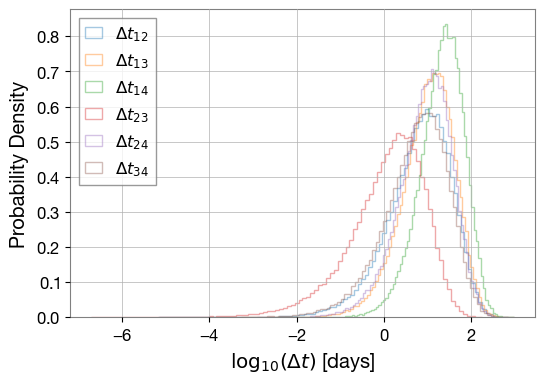

In [7]:
# plot histogram of time delays
# plot
plt.figure(figsize=(6,4))
# all
plt.hist(dt12, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{12}$', histtype='step', color='C0')
plt.hist(dt13, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{13}$', histtype='step', color='C1')
plt.hist(dt14, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{14}$', histtype='step', color='C2')
plt.hist(dt23, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{23}$', histtype='step', color='C3')
plt.hist(dt24, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{24}$', histtype='step', color='C4')
plt.hist(dt34, bins=100, density=True, alpha=0.4, label=r'$\Delta t_{34}$', histtype='step', color='C5')
plt.xlabel(r'$\log_{10}(\Delta t)$ [days]')
plt.ylabel('Probability Density')
#show legend
plt.legend() 
plt.show()

In [9]:
ler = LeR(npool=int(4),z_min=0., z_max=10., batch_size=25000,
    m_min=1., 
    m_max=3.,
    event_type='BNS',
    category='popI_II',
    sub_category='Alsing',
    spin_constant=0.,
    mtot_min=2., 
    mtot_max=18., 
    nsamples_mtot=50, 
    nsamples_mass_ratio=100, 
    sampling_frequency=2048.,
    waveform_approximant = 'TaylorF2', 
    minimum_frequency = 20., 
    snr_type = 'interpolation', 
    waveform_inspiral_must_be_above_fmin=False,
    interpolator_dir="../interpolator_pickle")

Given: Inspiral waveform, TaylorF2.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be generated for L1 detector at ../interpolator_pickle/L1/halfSNR_dict_1.pickle
Interpolator will be generated for H1 detector at ../interpolator_pickle/H1/halfSNR_dict_1.pickle
Interpolator will be generated for V1 detector at ../interpolator_pickle/V1/halfSNR_dict_1.pickle
Generating interpolator for ['L1', 'H1', 'V1'] detectors


interpolation for each mass_ratios: 100%|█████████████████████████| 100/100 [00:22<00:00,  4.48it/s]


interpolator generated


In [12]:
# getting data from json
# all
with open("./unlensed_params_BNS_Alsing_1M.json") as f:
    unlensed_params = json.load(f)
with open("./lensed_params_BNS_Alsing_1M.json") as f:
    lensed_params = json.load(f)
# detectable
with open("./unlensed_params_detectable_BNS_Alsing_1M.json") as f:
    unlensed_params_detectable = json.load(f)
with open("./lensed_params_detectable_BNS_Alsing_1M.json") as f:
    lensed_params_detectable = json.load(f)

In [19]:
mu_rel0, dt_rel0, mu_rel90, dt_rel90 = \
    ler.relative_mu_dt_lensed(lensed_param=lensed_params, snr_threshold=[4.,4.])

dmu, dt = ler.relative_mu_dt_unlensed(param=unlensed_params, size=200)

In [20]:
len(mu_rel0)

31

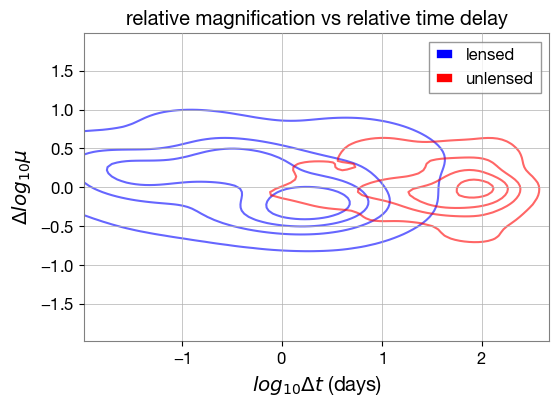

In [21]:
# plot
plt.figure(figsize=(6,4))
ler.mu_vs_dt_plot(x_array=dt_rel0, y_array=mu_rel0, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
# labels
plt.xlabel(r"$log_{10}\Delta t$ (days)")
plt.ylabel(r"$\Delta log_{10}\mu$")
plt.title(r"relative magnification vs relative time delay")
# legend
custom_lines = [Line2D([0], [0], color='blue', lw=1.5),
                Line2D([0], [0], color='red', lw=1.5)]
plt.legend(custom_lines, ['lensed', 'unlensed'])
plt.savefig("mu_vs_dt_conf1.png")
plt.show()